In [1]:
# Imports and Initial Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Data
df = pd.read_excel('Voting_Poll_Sites_20250329.xlsx')

In [3]:
# Data Cleaning
# Remove empty rows and columns
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

# Clean up column names
df.columns = df.columns.str.strip()

In [4]:
#1. Basic Data Exploration
print("First 5 rows:")
print(df.head())
print("\nData shape:", df.shape)
print("\nData info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows:
     BOROUGH SITE_STATUS                      SITE_NAME SITE_NUMBER  \
0   BROOKLYN           A                          PS 12       11537   
1     QUEENS           A        Allen AME Senior Center       10590   
2   BROOKLYN           A         Marlboro Memorial Post       11493   
3   BROOKLYN           A                PAL-Wynn Center       11629   
4  MANHATTAN           A  George Washington High School       11620   

  STREET_NUMBER     STREET_NAME POSTCODE      CITY  \
0           430   Howard Avenue    11233  Brooklyn   
1        112-04      167 Street    11433   Jamaica   
2           300        Avenue X    11223  Brooklyn   
3           495    Gates Avenue    11216  Brooklyn   
4           549  Audubon Avenue    10040  New York   

                            VOTER_ENTRANCE  \
0  430 Howard Avenue (not used for voters)   
1                      112-04 167th Street   
2                             300 Avenue X   
3                         495 Gates Avenue   
4   

# Data Analysis

     Borough  Count
0   BROOKLYN    398
1     QUEENS    287
2  MANHATTAN    275
3      BRONX    188
4  STATEN IS     80


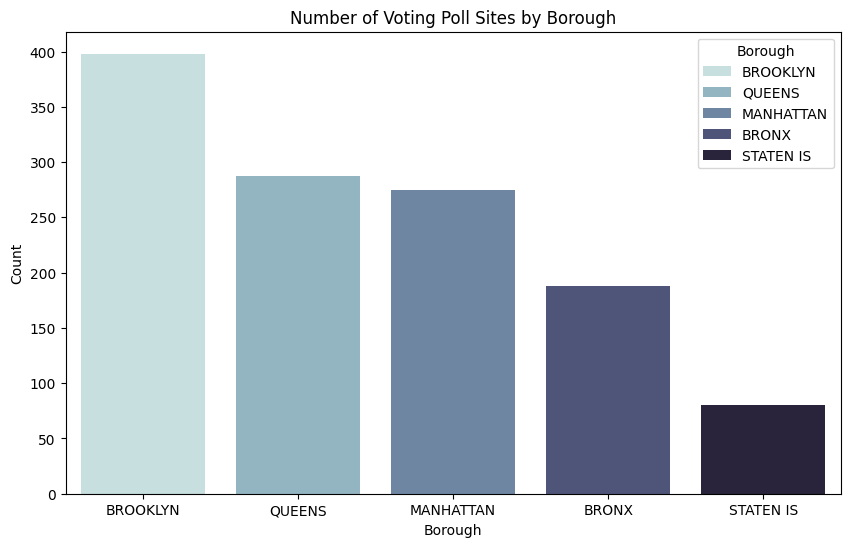

In [5]:
## 2. Borough Distribution Analysis
plt.figure(figsize=(10, 6))

# Convert value_counts result to DataFrame
borough_counts = df['BOROUGH'].value_counts().reset_index()
borough_counts.columns = ['Borough', 'Count']
print(borough_counts)
# Use hue to satisfy future Seaborn requirements
sns.barplot(data=borough_counts, x='Borough', y='Count', hue='Borough', palette='ch:start=.2,rot=-.3', legend=True)

plt.title('Number of Voting Poll Sites by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

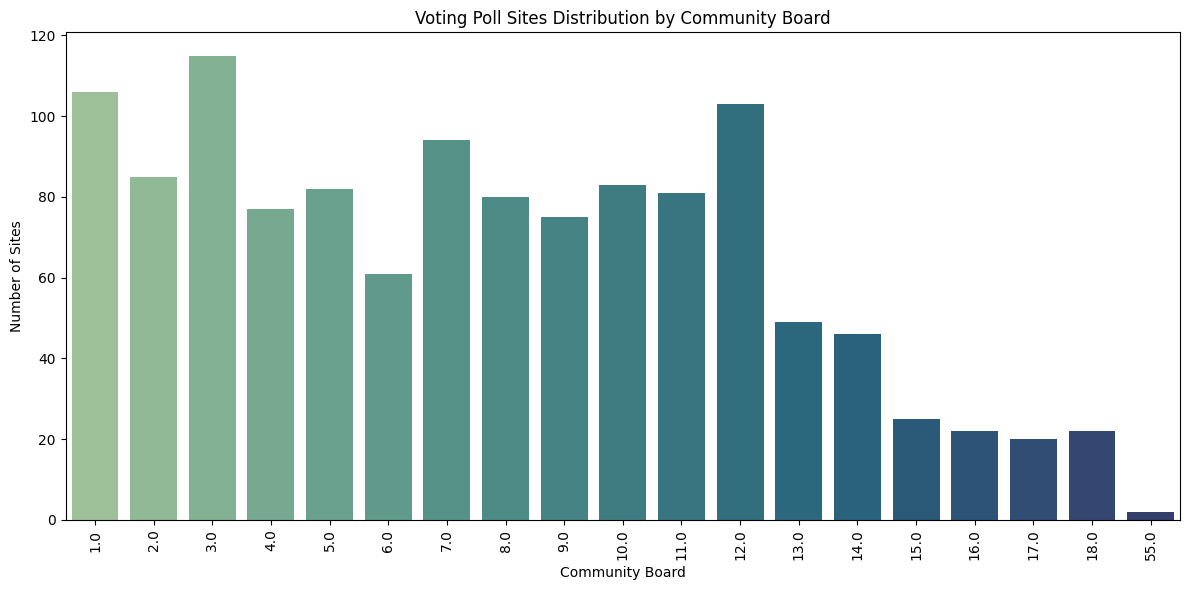

In [6]:
## 3. Community Board Distribution
community_board_counts = df['Community Board'].value_counts().sort_index().reset_index()
community_board_counts.columns = ['Community Board', 'Count']
community_board_counts['Community Board'] = community_board_counts['Community Board'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=community_board_counts,x='Community Board',y='Count',hue='Community Board',palette='crest',legend=False)

plt.title('Voting Poll Sites Distribution by Community Board')
plt.xlabel('Community Board')
plt.ylabel('Number of Sites')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

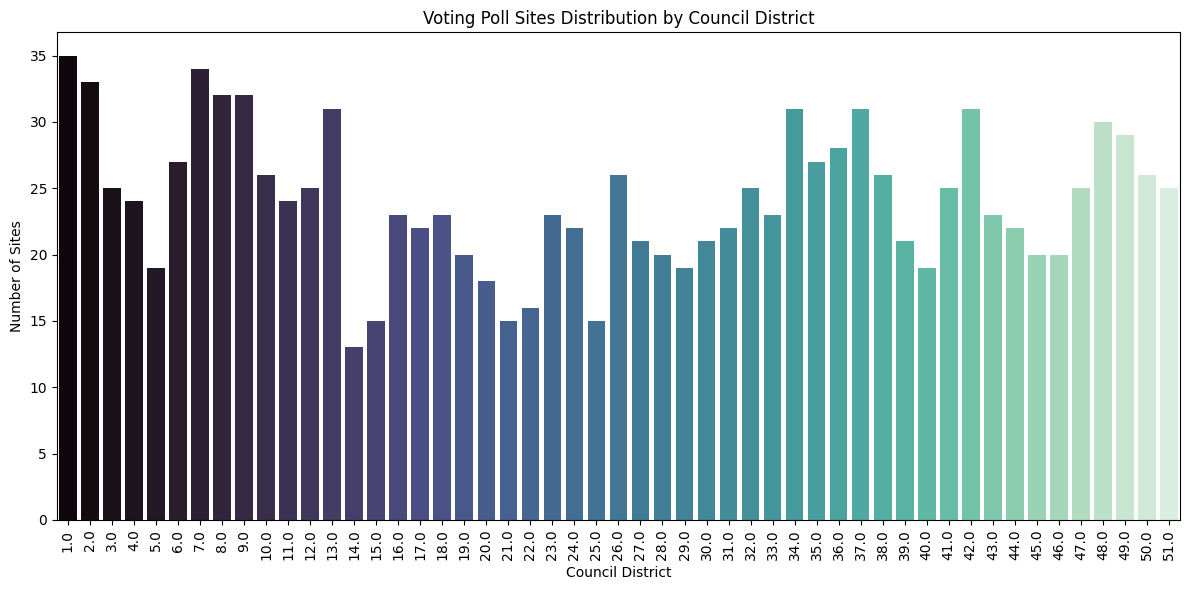

In [7]:
#4. Council District Analysis
plt.figure(figsize=(12, 6))

# Convert value_counts to a DataFrame
council_district_counts = df['Council District'].value_counts().sort_index().reset_index()
council_district_counts.columns = ['Council District', 'Count']
council_district_counts['Council District'] = council_district_counts['Council District'].astype(str)

sns.barplot(data=council_district_counts, x='Council District', y='Count', hue='Council District', palette='mako', legend=False)

plt.title('Voting Poll Sites Distribution by Council District')
plt.xlabel('Council District')
plt.ylabel('Number of Sites')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


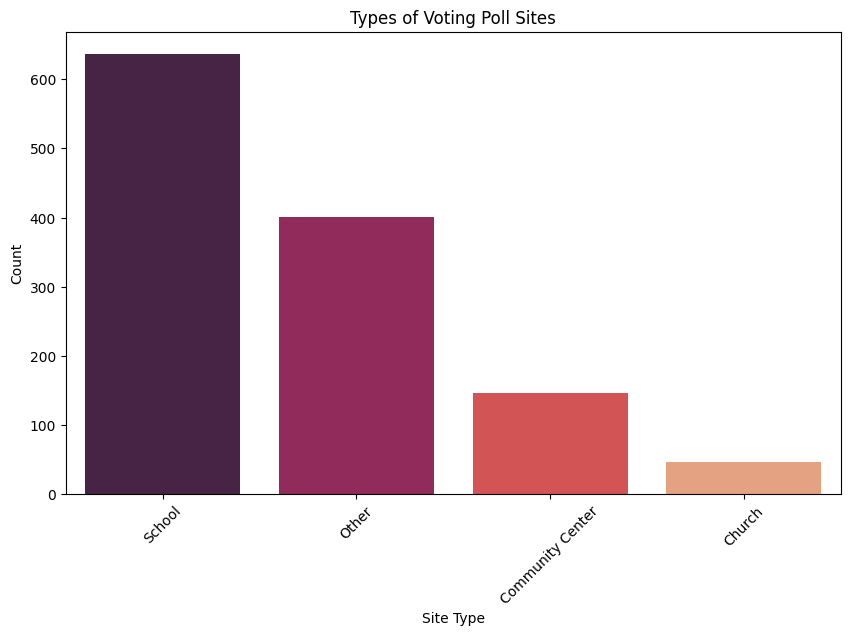

In [8]:
#5. Classify Site Type
df['Site Type'] = df['SITE_NAME'].apply(
    lambda x: 'School' if any(code in str(x) for code in ['PS', 'IS', 'HS', 'JHS']) 
    else 'Community Center' if any(word in str(x) for word in ['Center', 'Ctr']) 
    else 'Church' if any(word in str(x) for word in ['Church', 'Parish']) 
    else 'Other'
)

# Convert to DataFrame for Seaborn
site_type_counts = df['Site Type'].value_counts().reset_index()
site_type_counts.columns = ['Site Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=site_type_counts,x='Site Type',y='Count',hue='Site Type',palette='rocket',legend=False)

plt.title('Types of Voting Poll Sites')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

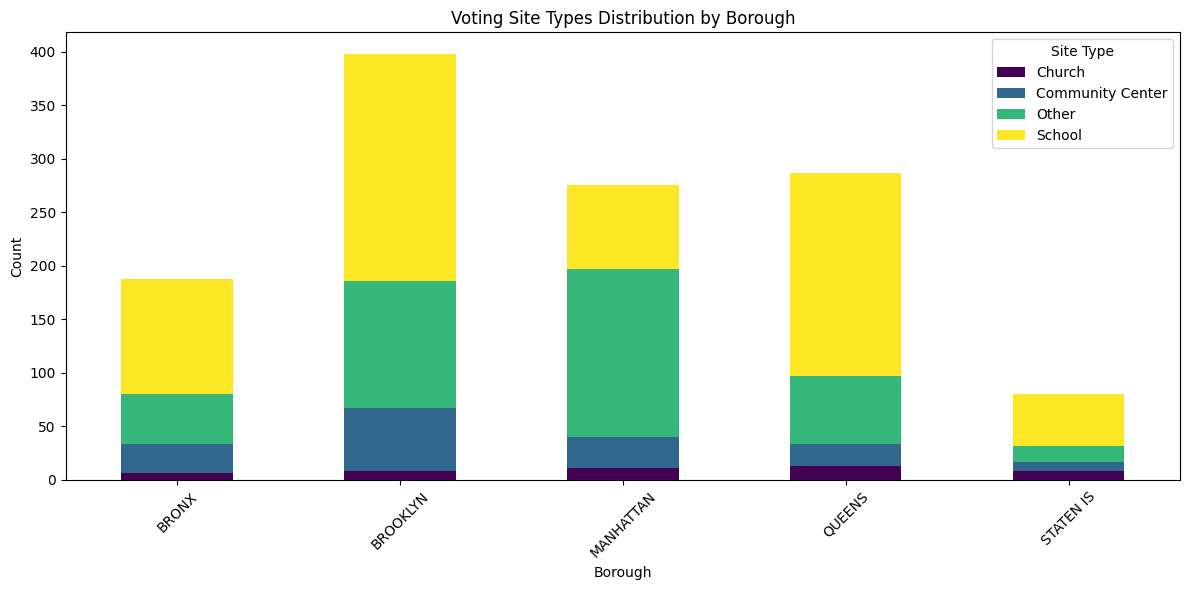

In [9]:
## 6. Borough vs Site Type Cross Analysis
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df['BOROUGH'], df['Site Type'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Voting Site Types Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Site Type')
plt.tight_layout()
plt.show()

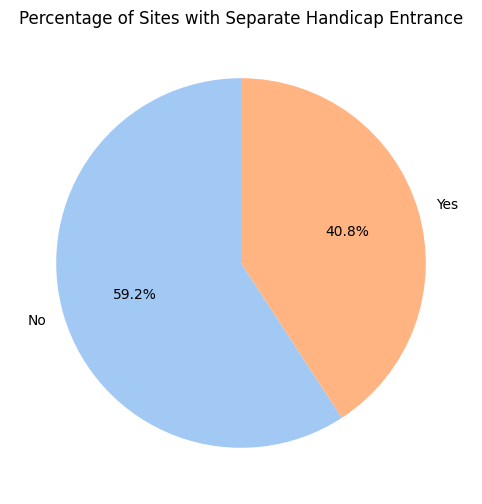

In [10]:
## 7. Handicap Accessibility Analysis
df['HANDICAP_ENTRANCE'] = df['HANDICAP_ENTRANCE'].fillna('Not Specified')
df['Has_Separate_Handicap_Entrance'] = df['HANDICAP_ENTRANCE'].apply(
    lambda x: 'Yes' if str(x).lower() != 'not specified' and str(x).lower() != str(df.loc[df['HANDICAP_ENTRANCE'] == x, 'VOTER_ENTRANCE'].iloc[0]).lower() 
    else 'No')

plt.figure(figsize=(8, 6))
handicap_counts = df['Has_Separate_Handicap_Entrance'].value_counts()
plt.pie(handicap_counts, labels=handicap_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Percentage of Sites with Separate Handicap Entrance')
plt.show()

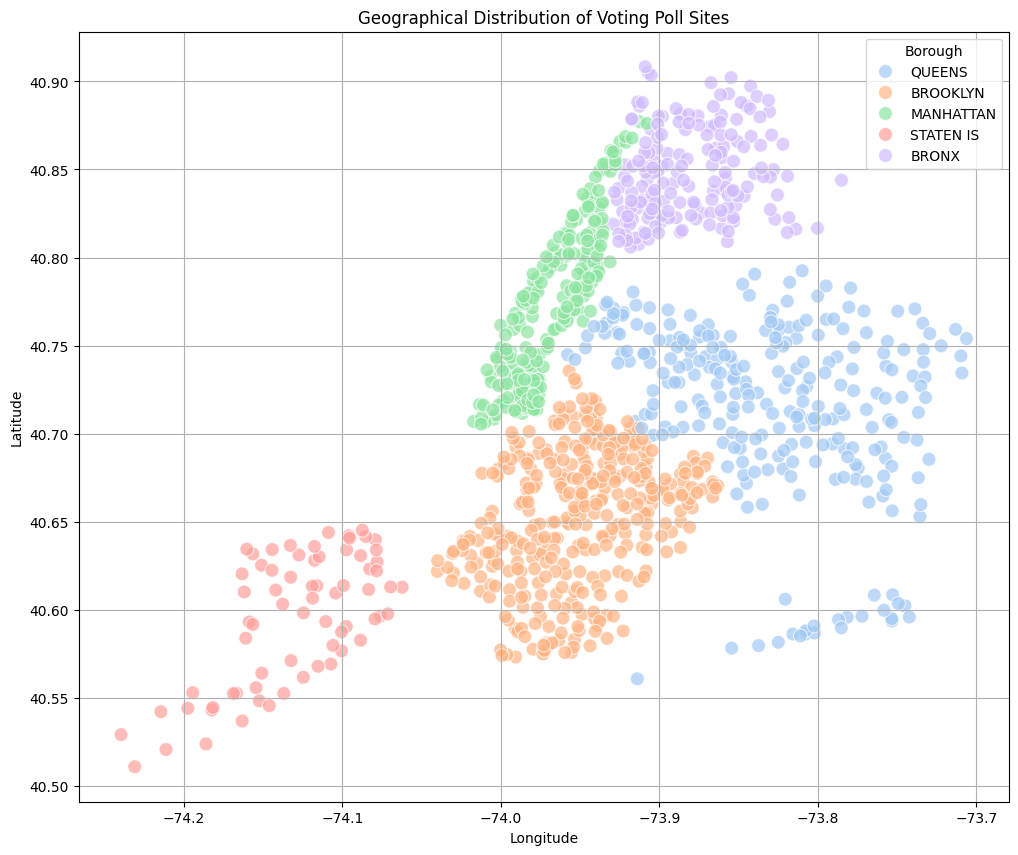

In [11]:
## 8. Location Coordinates Analysis (for sites with coordinates)
# Extract latitude and longitude from Location column
df['Location'] = df['Location'].str.strip('()')
df[['Latitude', 'Longitude']] = df['Location'].str.split(', ', expand=True)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Plot geographical distribution
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df.dropna(subset=['Latitude', 'Longitude']), 
                x='Longitude', y='Latitude', hue='BOROUGH', 
                palette='pastel', s=100, alpha=0.7)
plt.title('Geographical Distribution of Voting Poll Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

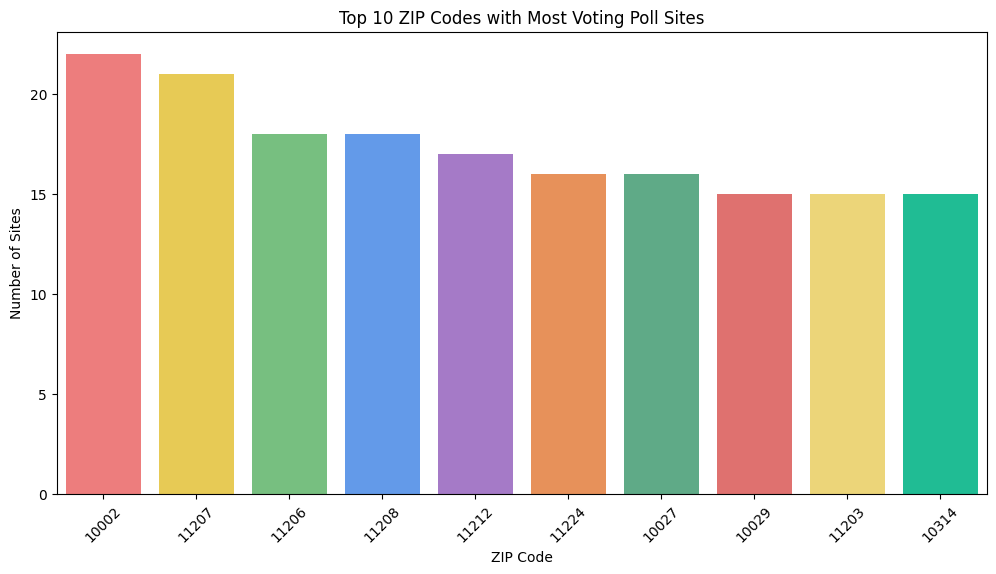

In [12]:
#9. Convert POSTCODE to string and standardize to 5 digits
df['POSTCODE'] = df['POSTCODE'].astype(str).str[:5]

# Get top 10 ZIP codes
top_zipcodes = df['POSTCODE'].value_counts().head(10).reset_index()
top_zipcodes.columns = ['ZIP Code', 'Number of Sites']

# Custom colors for each ZIP Code
custom_colors = ['#FF6B6B', '#FFD93D', '#6BCB77', '#4D96FF', '#A66DD4',
                 '#FF8C42', '#52B788', '#F25F5C', '#FFE066', '#06D6A0']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zipcodes, x='ZIP Code', y='Number of Sites', hue='ZIP Code', palette=custom_colors, legend=False)

plt.title('Top 10 ZIP Codes with Most Voting Poll Sites')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Sites')
plt.xticks(rotation=45)
plt.show()


In [13]:
## 10. Statistical Summary
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
         BOROUGH SITE_STATUS SITE_NAME  SITE_NUMBER  STREET_NUMBER  \
count       1228        1230      1230       1230.0         1230.0   
unique         5           1      1202       1230.0          925.0   
top     BROOKLYN           A    PS 130      10574.0          200.0   
freq         398        1230         3          1.0           12.0   
mean         NaN         NaN       NaN          NaN            NaN   
std          NaN         NaN       NaN          NaN            NaN   
min          NaN         NaN       NaN          NaN            NaN   
25%          NaN         NaN       NaN          NaN            NaN   
50%          NaN         NaN       NaN          NaN            NaN   
75%          NaN         NaN       NaN          NaN            NaN   
max          NaN         NaN       NaN          NaN            NaN   

             STREET_NAME POSTCODE      CITY   VOTER_ENTRANCE  \
count               1230     1230      1230             1229   
unique   

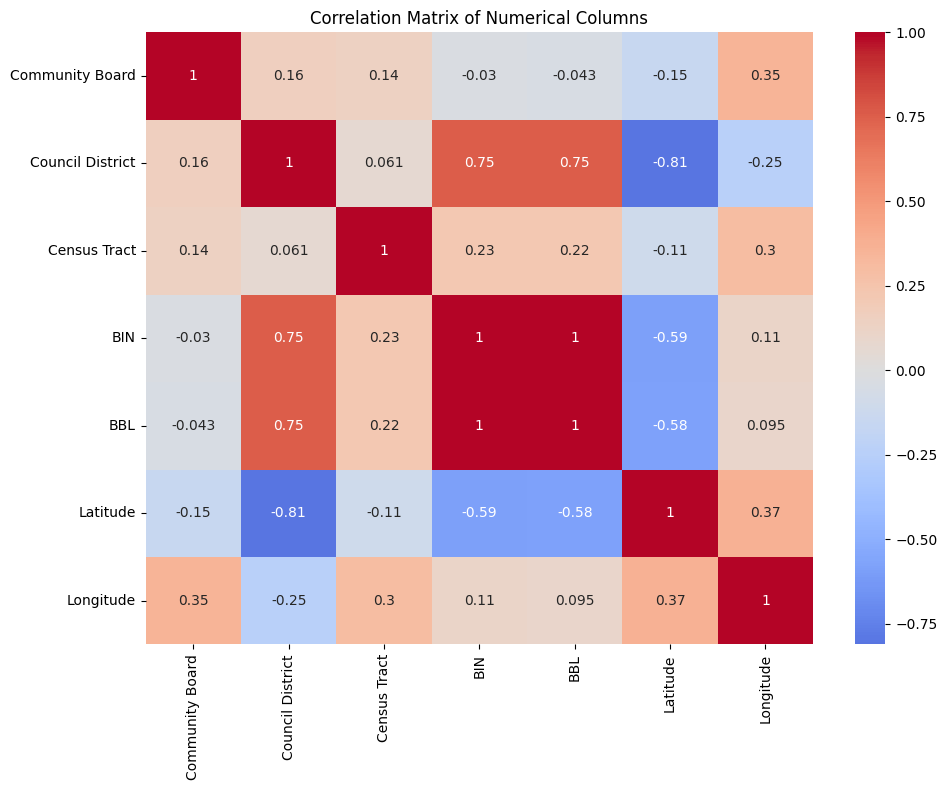

In [14]:
## 11. Correlation Analysis (for numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Columns')
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough numerical columns for correlation analysis.")

In [15]:
## 12. BIN (Building Identification Number) Analysis
# Check if BIN values are unique
print("\nNumber of unique BINs:", df['BIN'].nunique())
print("Number of sites:", len(df))
print("Percentage of unique BINs:", df['BIN'].nunique()/len(df)*100)


Number of unique BINs: 1217
Number of sites: 1230
Percentage of unique BINs: 98.9430894308943


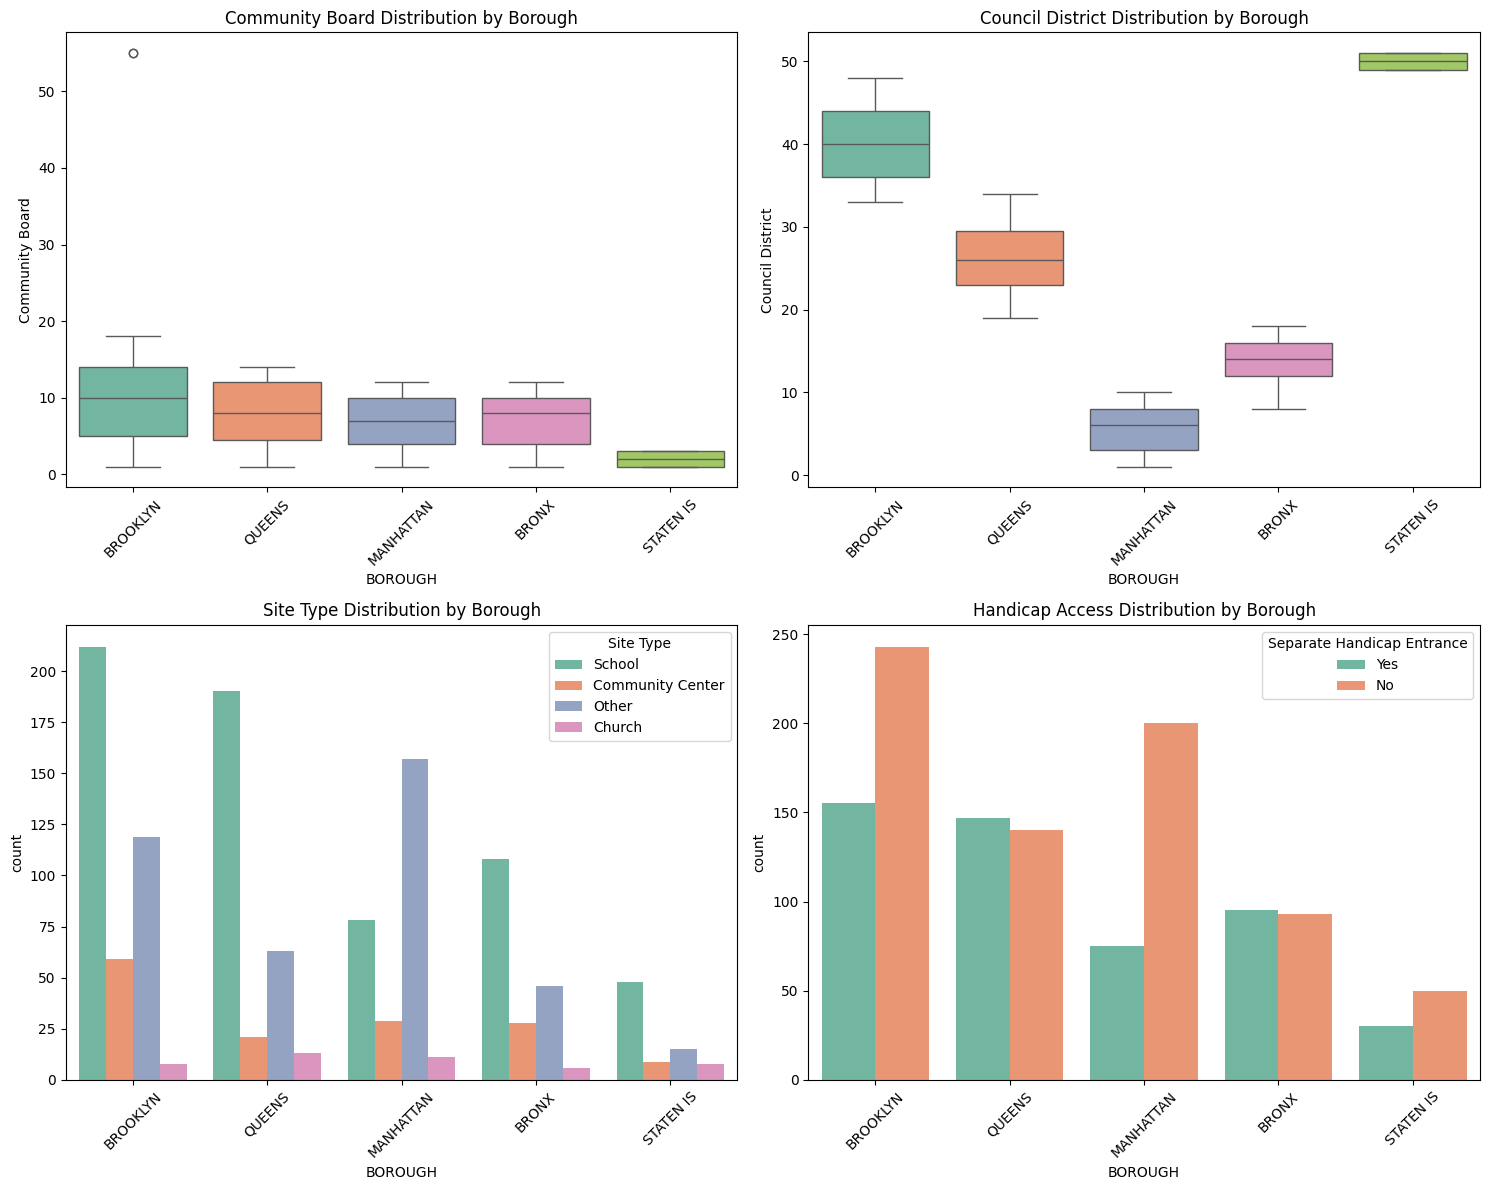

In [16]:
#13. Multi-Aspect Borough Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Borough vs Community Board
sns.boxplot(data=df, x='BOROUGH', y='Community Board', hue='BOROUGH', ax=axes[0, 0], palette='Set2', dodge=False, legend=False)
axes[0, 0].set_title('Community Board Distribution by Borough')
axes[0, 0].tick_params(axis='x', rotation=45)

# Borough vs Council District
sns.boxplot(data=df, x='BOROUGH', y='Council District', hue='BOROUGH', ax=axes[0, 1], palette='Set2', dodge=False, legend=False)
axes[0, 1].set_title('Council District Distribution by Borough')
axes[0, 1].tick_params(axis='x', rotation=45)

# Borough vs Site Type
sns.countplot(data=df, x='BOROUGH', hue='Site Type', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Site Type Distribution by Borough')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Site Type')

# Borough vs Handicap Access
sns.countplot(data=df, x='BOROUGH', hue='Has_Separate_Handicap_Entrance', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Handicap Access Distribution by Borough')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Separate Handicap Entrance')

plt.tight_layout()
plt.show()


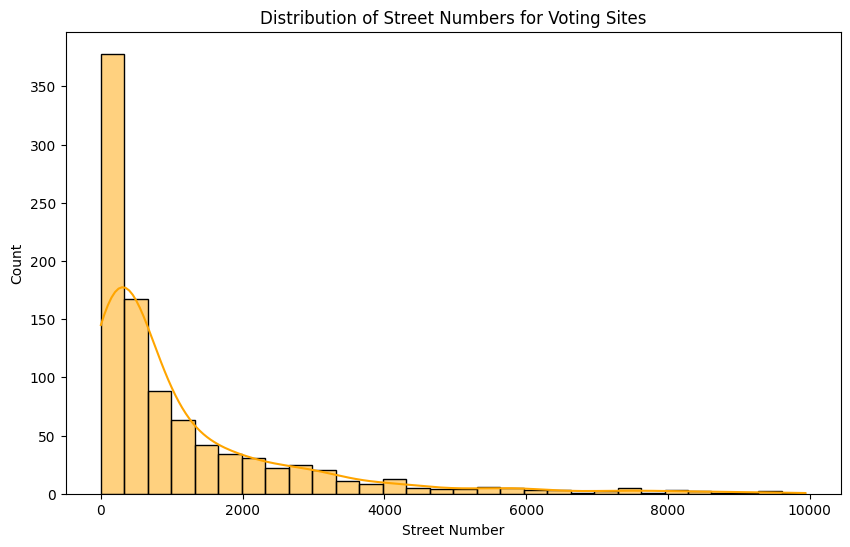

In [17]:
## 14. Street Number Analysis
df['STREET_NUMBER'] = pd.to_numeric(df['STREET_NUMBER'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(df['STREET_NUMBER'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Street Numbers for Voting Sites')
plt.xlabel('Street Number')
plt.ylabel('Count')
plt.show()



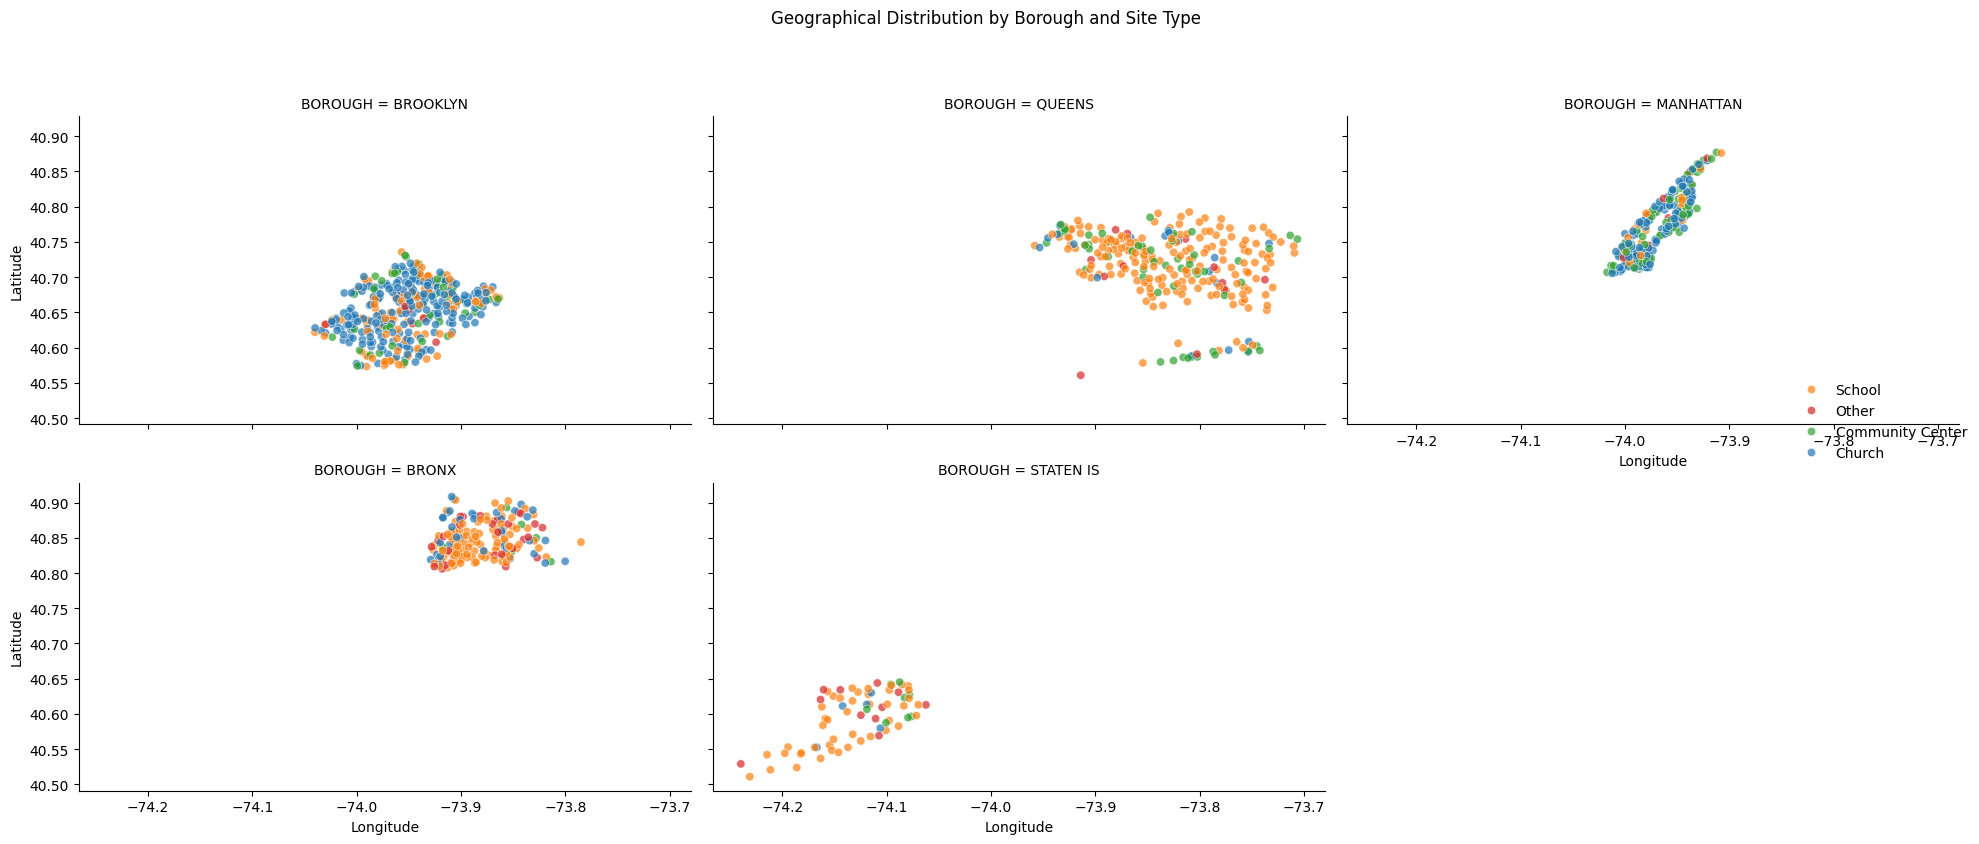

In [18]:
## 15. Multi-dimensional Analysis
g = sns.FacetGrid(df, col='BOROUGH', col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='Longitude', y='Latitude', hue='Site Type', alpha=0.7)
g.add_legend()
g.fig.suptitle('Geographical Distribution by Borough and Site Type', y=1.05)
plt.tight_layout()
plt.show()